# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from IPython.display import display
from datetime import datetime
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Reading the DataSet

#### Option 1 - load dataset from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_name = '/content/drive/My Drive/Team 10- AI Data Analyst/Week 3 Deliverables/Cleaned_Preprocessed_Dataset.csv' # Get the uploaded file name
#Load the dataset, specifying the encoding
df = pd.read_csv(file_name, encoding='latin1')

#### Option 2 - load dataset from your local machine

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Preprocessed_Dataset.csv to Cleaned_Preprocessed_Dataset.csv


In [3]:
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
# Load the dataset, specifying the encoding
df = pd.read_csv(file_name, encoding='latin1')

In [4]:
# Seeing the head
df.head()

,learner_signup_datetime,opportunity_id,opportunity_end_date,first_name,date_of_birth,institution_name,current/intended_major,entry_created_at,status_code,apply_date,...,opportunity_name_Jump Start: Developing your Emotional Intelligence,opportunity_name_Mental and Physical Health Session,opportunity_name_Project Management,opportunity_name_Project Management Associate,opportunity_name_Slide Geeks: A Presentation Design Competition,opportunity_name_Startup Mastery Workshop,opportunity_name_UX Redesign Challenge,opportunity_name_Upload Your First Year Transcript,opportunity_name_UrbanRenew Challenge,opportunity_name_Xperience Design Hackathon
0,2023-06-14,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Faria,2001-01-12,Nwihs,Radiology,2024-03-11,0.636364,2023-06-14,...,False,False,False,False,False,False,False,False,False,False
1,2023-05-01,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Poojitha,2000-08-16,Saint Louis University,Information Systems,2024-03-11,0.636364,2023-05-01,...,False,False,False,False,False,False,False,False,False,False
2,2023-04-09,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Emmanuel,2002-01-27,Illinois Institute of Technology,Computer Science,2024-03-11,0.636364,2023-05-11,...,False,False,False,False,False,False,False,False,False,False
3,2023-08-29,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Amrutha Varshini,1999-11-01,Saint Louis University,Information Systems,2024-03-11,0.545455,2023-10-09,...,False,False,False,False,False,False,False,False,False,False
4,2023-01-06,00000000-0GN2-A0AY-7XK8-C5FZPP,2024-06-29,Vinay Varshith,2000-04-19,Saint Louis University,Computer Science,2024-03-11,0.636364,2023-01-06,...,False,False,False,False,False,False,False,False,False,False


## Selecting the columns

In [5]:
columns = [
    'status_code', 'age', 'opportunity_duration',
     'opportunity_end_date_month',
    'opportunity_start_date_month', 'engagement_time', 'duration_age_interaction',
    'engagement_score', 'opportunity_category_Competition', 'opportunity_category_Course',
    'opportunity_category_Engagement', 'opportunity_category_Event',
    'opportunity_category_Internship',
     "gender_Don't want to specify", 'gender_Female',
    'gender_Male', 'gender_Other','opportunity_name_AI Ethics Challenge', 'opportunity_name_Business Consulting',
    'opportunity_name_CPR/AED Certification', 'opportunity_name_Career Essentials: Getting Started with Your Professional Journey',
    'opportunity_name_Data Visualization', 'opportunity_name_Data Visualization Associate',
    'opportunity_name_Digital Marketing', 'opportunity_name_Digital Strategy Virtual Internship',
    'opportunity_name_Freelance Mastery workshop', 'opportunity_name_Health Care Management',
    'opportunity_name_Innovation & Entrepreneurship', 'opportunity_name_Join a Student Organisation',
    'opportunity_name_Jump Start: Developing your Emotional Intelligence',
    'opportunity_name_Mental and Physical Health Session', 'opportunity_name_Project Management',
    'opportunity_name_Project Management Associate', 'opportunity_name_Slide Geeks: A Presentation Design Competition',
    'opportunity_name_Startup Mastery Workshop', 'opportunity_name_UX Redesign Challenge',
    'opportunity_name_Upload Your First Year Transcript', 'opportunity_name_UrbanRenew Challenge',
    'opportunity_name_Xperience Design Hackathon', 'drop_off'
]

df_copy = df[columns]

In [6]:
df_copy['drop_off'].value_counts()

,count
drop_off,
0.0,7835
1.0,701


In [7]:
df_copy.head()

,status_code,age,opportunity_duration,opportunity_end_date_month,opportunity_start_date_month,engagement_time,duration_age_interaction,engagement_score,opportunity_category_Competition,opportunity_category_Course,...,opportunity_name_Mental and Physical Health Session,opportunity_name_Project Management,opportunity_name_Project Management Associate,opportunity_name_Slide Geeks: A Presentation Design Competition,opportunity_name_Startup Mastery Workshop,opportunity_name_UX Redesign Challenge,opportunity_name_Upload Your First Year Transcript,opportunity_name_UrbanRenew Challenge,opportunity_name_Xperience Design Hackathon,drop_off
0,0.636364,0.227273,0.747961,6,11,0.677536,0.376111,0.801853,False,True,...,False,False,False,False,False,False,False,False,False,0.0
1,0.636364,0.227273,0.747961,6,11,0.624396,0.376111,0.782128,False,True,...,False,False,False,False,False,False,False,False,False,0.0
2,0.636364,0.204545,0.747961,6,11,0.636473,0.366075,0.786163,False,True,...,False,False,False,False,False,False,False,False,False,0.0
3,0.545455,0.250000,0.747961,6,11,0.818841,0.386148,0.854752,False,True,...,False,False,False,False,False,False,False,False,False,0.0
4,0.636364,0.227273,0.747961,6,11,0.485507,0.376111,0.730574,False,True,...,False,False,False,False,False,False,False,False,False,0.0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 40 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   status_code                                                                         8536 non-null   float64
 1   age                                                                                 8536 non-null   float64
 2   opportunity_duration                                                                8536 non-null   float64
 3   opportunity_end_date_month                                                          8536 non-null   int64  
 4   opportunity_start_date_month                                                        8536 non-null   int64  
 5   engagement_time                                                                     8536 non-null

## Splitting the data

In [8]:
#Seed value
s = 101

In [9]:
#Selecting the target and feature variables
X = df_copy.drop('drop_off', axis=1) #Feature
y = df_copy["drop_off"] #Target

In [10]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = s )

In [11]:
#Seeing the shape of X_train, and X_test
print('The shape of X_train: ', X_train.shape)
print('The shape of X_test: ', X_test.shape)

The shape of X_train:  (6828, 39)
The shape of X_test:  (1708, 39)


In [12]:
#Seeing the shape of y_train, and y_test
print('The shape of y_train: ', y_train.shape)
print('The shape of y_test: ', y_test.shape)

The shape of y_train:  (6828,)
The shape of y_test:  (1708,)


# Modeling:


## 1. RandomForestClassifier Model

In [13]:
# initialize the model
rfc = RandomForestClassifier(random_state= 101)

# train the data using the training sets
rfc.fit(X_train, y_train)

# predict using the test data
rfc_pred = rfc.predict(X_test)

# evaluation the model
print("Classification Report:")

print(classification_report(y_test, rfc_pred, zero_division=0), '\n')

# assign labels for the confusion matrix
labels = ['1: Drop Off', '0: No drop-off']

print("Confusion Matrix:")
pd.DataFrame(data=confusion_matrix(y_test, rfc_pred), index=labels, columns=labels)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1568
         1.0       1.00      0.99      1.00       140

    accuracy                           1.00      1708
   macro avg       1.00      1.00      1.00      1708
weighted avg       1.00      1.00      1.00      1708
 

Confusion Matrix:


,1: Drop Off,0: No drop-off
1: Drop Off,1568,0
0: No drop-off,1,139


#### RandomForestClassifier Hyperparameter Tuning

In [14]:
# Define Random Forest model
rf_model = RandomForestClassifier(random_state=101)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 10, None],  # Max tree depth
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Set up GridSearchCV
# Use precision for scoring if falsely labeling a student as a dropout is costly
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}


#### Rebuild RandomForestClassifier Model using the best parameters

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1568
         1.0       1.00      0.99      1.00       140

    accuracy                           1.00      1708
   macro avg       1.00      1.00      1.00      1708
weighted avg       1.00      1.00      1.00      1708
 

Confusion Matrix:


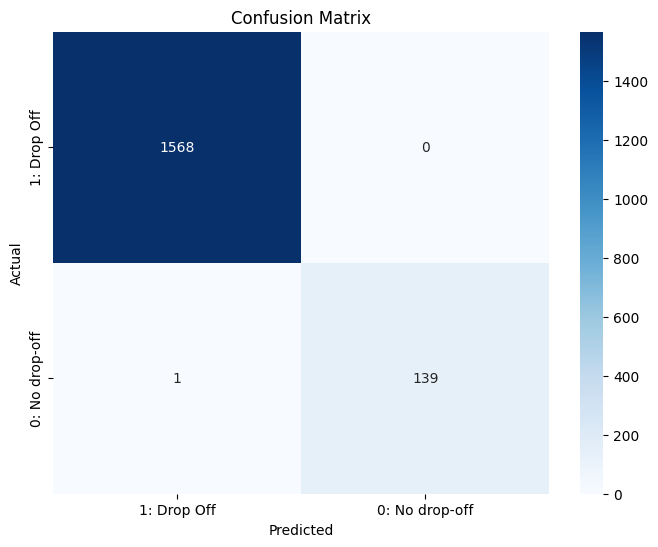

<Figure size 640x480 with 0 Axes>

In [20]:
# initialize the model
rfc_1 = RandomForestClassifier(criterion = 'gini', max_depth= None,
                               n_estimators=100, class_weight='balanced', random_state= s)

# train the data using the training sets
rfc_1.fit(X_train, y_train)

# predict using the test data
rfc_1_pred = rfc_1.predict(X_test)

# evaluation the model using the y_testing dataset and the classifier predictions
print("Classification Report:")

print(classification_report(y_test, rfc_1_pred, zero_division=0), '\n')

# assign labels for the confusion matrix
labels = ['1: Drop Off', '0: No drop-off']

print("Confusion Matrix:")
cm = confusion_matrix(y_test, rfc_1_pred)
pd.DataFrame(data= cm , index=labels, columns=labels)

#Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.savefig("Confusion Matrix_RFC", dpi=300, bbox_inches="tight")

#### Features Importance in The RandomForest Model

In [16]:
# lets get the features and their importance
feature_importances = rfc_1.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Convert importance to percentage
importance_df["Importance (%)"] = (importance_df["Importance"] / importance_df["Importance"].sum()) * 100

# Sort by importance (descending)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance,Importance (%)
0,status_code,3.378675e-01,33.786750
5,engagement_time,1.707448e-01,17.074485
7,engagement_score,1.628166e-01,16.281656
6,duration_age_interaction,5.686065e-02,5.686065
12,opportunity_category_Internship,5.317785e-02,5.317785
3,opportunity_end_date_month,3.954392e-02,3.954392
2,opportunity_duration,3.861682e-02,3.861682
4,opportunity_start_date_month,2.976755e-02,2.976755
1,age,2.077050e-02,2.077050
22,opportunity_name_Data Visualization Associate,1.300980e-02,1.300980


## 2. SupportVectorClassifier Model

In [ ]:
# initialize the model
svc = SVC()

# train the data using the training sets
svc.fit(X_train, y_train)

# predict using the test data
svc_pred= svc.predict(X_test)

# evaluation the model using the y_testing dataset and the classifier predictions
print("Classification Report:")

print(classification_report(y_test, svc_pred, zero_division=0), '\n')

# assign labels for the confusion matrix
labels = ['1: Drop Off', '0: No drop-off']

print("Confusion Matrix:")
pd.DataFrame(data=confusion_matrix(y_test, svc_pred), index=labels, columns=labels)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1568
         1.0       0.00      0.00      0.00       140

    accuracy                           0.92      1708
   macro avg       0.46      0.50      0.48      1708
weighted avg       0.84      0.92      0.88      1708
 

Confusion Matrix:


,1: Drop Off,0: No drop-off
1: Drop Off,1568,0
0: No drop-off,140,0


#### SupportVectorClassifier Hyperparameter Tuning

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# # Define parameter grid
# param_grid = {
#     'C': np.logspace(-2, 2, 5),  # Log scale for better range
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto', 0.01]
# }

# # Use RandomizedSearchCV
# random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter=10, cv=5, scoring='recall', n_jobs=-1, random_state=s)
# random_search.fit(X_train, y_train)

# # Print best parameters
# print("Best Parameters:", random_search.best_params_)


#### Rebuild SupportVectorClassifier Model using the best parameters

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1568
         1.0       0.65      1.00      0.79       140

    accuracy                           0.96      1708
   macro avg       0.83      0.98      0.88      1708
weighted avg       0.97      0.96      0.96      1708
 

Confusion Matrix:


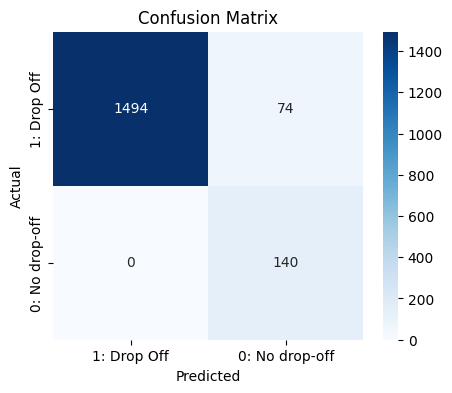

In [ ]:
# initialize the model
svc_1 = SVC(C=10, gamma='auto', kernel='poly', degree=3, class_weight='balanced')
#svc_1 = SVC(C=75, gamma='auto', kernel='rbf', class_weight='balanced')

# train the data using the training sets
svc_1 = svc_1.fit(X_train, y_train)

# predict using the test data
svc_1_pred = svc_1.predict(X_test)

# evaluation the model using the y_testing dataset and the classifier predictions
print("Classification Report:")

print(classification_report(y_test, svc_1_pred, zero_division=0), '\n')

# assign labels for the confusion matrix
labels = ['1: Drop Off', '0: No drop-off']

print("Confusion Matrix:")
cm = confusion_matrix(y_test, svc_1_pred)
pd.DataFrame(data= cm , index=labels, columns=labels)

 #Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Features and Its Importance in SupportVector Model

In [ ]:
# lets get the features and their importance from 'svc_1_model'
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(svc_1, X_test, y_test, scoring='recall')

# Get feature importance scores
feature_importances = perm_importance.importances_mean

# Get feature names
feature_names = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# convert impertance to percentage
importance_df["Importance (%)"] = (importance_df["Importance"] / importance_df["Importance"].sum()) * 100

# Sort by importance (descending)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance,Importance (%)
0,status_code,0.470000,24.298375
21,opportunity_name_Data Visualization,0.260000,13.441654
3,opportunity_end_date_month,0.232857,12.038405
31,opportunity_name_Project Management,0.220000,11.373708
23,opportunity_name_Digital Marketing,0.201429,10.413589
4,opportunity_start_date_month,0.150000,7.754801
27,opportunity_name_Innovation & Entrepreneurship,0.147143,7.607090
22,opportunity_name_Data Visualization Associate,0.065714,3.397341
18,opportunity_name_Business Consulting,0.050000,2.584934
20,opportunity_name_Career Essentials: Getting St...,0.034286,1.772526


## 3. DecisionTreeClassifier Model

In [ ]:
# initialize the model
dtc = DecisionTreeClassifier(random_state= s)

# train the data using the training sets
dtc.fit(X_train, y_train)

# predict using the test data
dtc_pred = dtc.predict(X_test)

# evaluation the model
print("Classification Report:")

print(classification_report(y_test, dtc_pred, zero_division=0), '\n')

# assign labels for the confusion matrix
labels = ['1: Drop Off', '0: No drop-off']

print("Confusion Matrix:")
pd.DataFrame(data=confusion_matrix(y_test, dtc_pred), index=labels, columns=labels)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1568
         1.0       1.00      1.00      1.00       140

    accuracy                           1.00      1708
   macro avg       1.00      1.00      1.00      1708
weighted avg       1.00      1.00      1.00      1708
 

Confusion Matrix:


,1: Drop Off,0: No drop-off
1: Drop Off,1568,0
0: No drop-off,0,140


#### DecisionTreeClassifier Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt = DecisionTreeClassifier(random_state=s)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy']
}

# Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)


{'criterion': 'gini', 'max_depth': 10}


#### Rebuild DecisionTreeClassifier Model using the best parameters

In [ ]:
# initialize the model
dtc_1 = DecisionTreeClassifier(criterion ='gini', max_depth =10,
                               random_state= s, class_weight='balanced')

# train the data using the training sets
dtc_1.fit(X_train, y_train)

# predict using the test data
dtc_1_pred = dtc_1.predict(X_test)

# evaluation the model
print("Classification Report:")

print(classification_report(y_test, dtc_1_pred, zero_division=0), '\n')

# assign labels for the confusion matrix
labels = ['1: Drop Off', '0: No drop-off']

print("Confusion Matrix:")
pd.DataFrame(data=confusion_matrix(y_test, dtc_1_pred), index=labels, columns=labels)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1568
         1.0       1.00      1.00      1.00       140

    accuracy                           1.00      1708
   macro avg       1.00      1.00      1.00      1708
weighted avg       1.00      1.00      1.00      1708
 

Confusion Matrix:


,1: Drop Off,0: No drop-off
1: Drop Off,1568,0
0: No drop-off,0,140


### Features and Its Importance in DecisionTreeClassifier Model

In [ ]:
# lets get the features and their importance
feature_importances = dtc_1.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Convert importance to percentage
importance_df["Importance (%)"] = (importance_df["Importance"] / importance_df["Importance"].sum()) * 100

# Sort by importance (descending)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df

,Feature,Importance,Importance (%)
0,status_code,5.864783e-01,5.864783e+01
7,engagement_score,4.091384e-01,4.091384e+01
1,age,4.383365e-03,4.383365e-01
2,opportunity_duration,7.578641e-17,7.578641e-15
15,gender_Male,4.155915e-17,4.155915e-15
38,opportunity_name_Xperience Design Hackathon,2.962012e-17,2.962012e-15
6,duration_age_interaction,0.000000e+00,0.000000e+00
23,opportunity_name_Digital Marketing,0.000000e+00,0.000000e+00
37,opportunity_name_UrbanRenew Challenge,0.000000e+00,0.000000e+00
36,opportunity_name_Upload Your First Year Transc...,0.000000e+00,0.000000e+00


In [ ]:
#Creating eval function for classification report and confusion matrix
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)

    print("confusion_matrix", '\n')
    print(confusion_matrix(y_test, y_pred))

    print("classification_report")
    print(classification_report(y_test, y_pred))

## 4. LogisticRegression Model

In [ ]:
# set seed value
s = 101

# Create the logistic regression model
logreg = LogisticRegression(random_state=s, class_weight='balanced')

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = logreg.predict(X_test)

#Printing the eval function
print('Logistic MODEL', '\n')
eval(logreg, X_train, X_test)
#AS we can see, there is no overfitting

Logistic MODEL 

confusion_matrix 

[[1494   74]
 [   0  140]]
classification_report
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1568
         1.0       0.65      1.00      0.79       140

    accuracy                           0.96      1708
   macro avg       0.83      0.98      0.88      1708
weighted avg       0.97      0.96      0.96      1708



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Feature Importance for normal Logistic Regression Model

In [ ]:
# Get the model's coefficients
coefficients = logreg.coef_[0]  # For binary logistic regression, we take the first row of the coefficients matrix

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame to display coefficients with feature names
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)  # For importance, we use the absolute value
})

# Sort by the absolute value of coefficients to see the most important features
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Print the top 10 most important features
feature_importance.head(10)


,Feature,Coefficient,Absolute Coefficient
0,status_code,15.984467,15.984467
33,opportunity_name_Slide Geeks: A Presentation D...,4.311172,4.311172
21,opportunity_name_Data Visualization,3.835672,3.835672
27,opportunity_name_Innovation & Entrepreneurship,3.767862,3.767862
23,opportunity_name_Digital Marketing,3.755762,3.755762
31,opportunity_name_Project Management,3.690771,3.690771
22,opportunity_name_Data Visualization Associate,-3.400460,3.400460
20,opportunity_name_Career Essentials: Getting St...,3.170733,3.170733
11,opportunity_category_Event,-3.133917,3.133917
18,opportunity_name_Business Consulting,-3.078538,3.078538


#Performance Evaluation for RFC, SVM and DTC

## Importing necessary libraries

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Function to evaluate a classification model

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Print classification report
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    print("🔹 Classification Report:\n", report_df)

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy

## Evaluation the Models

🔹 Classification Report:
               precision    recall  f1-score      support
0.0            0.999363  1.000000  0.999681  1568.000000
1.0            1.000000  0.992857  0.996416   140.000000
accuracy       0.999415  0.999415  0.999415     0.999415
macro avg      0.999681  0.996429  0.998048  1708.000000
weighted avg   0.999415  0.999415  0.999414  1708.000000

🔹 Accuracy: 0.9994


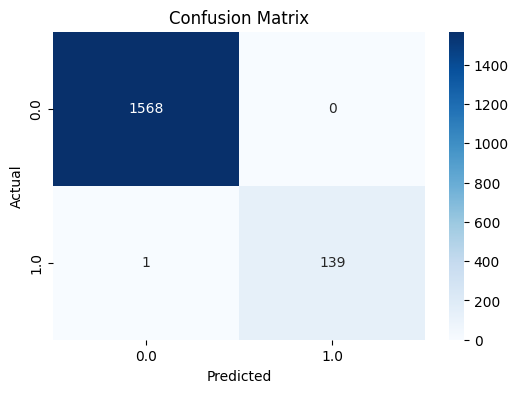

0.9994145199063232

In [ ]:
evaluate_model(rfc_1, X_test, y_test)

🔹 Classification Report:
               precision    recall  f1-score      support
0.0            1.000000  0.952806  0.975833  1568.000000
1.0            0.654206  1.000000  0.790960   140.000000
accuracy       0.956674  0.956674  0.956674     0.956674
macro avg      0.827103  0.976403  0.883397  1708.000000
weighted avg   0.971656  0.956674  0.960679  1708.000000

🔹 Accuracy: 0.9567


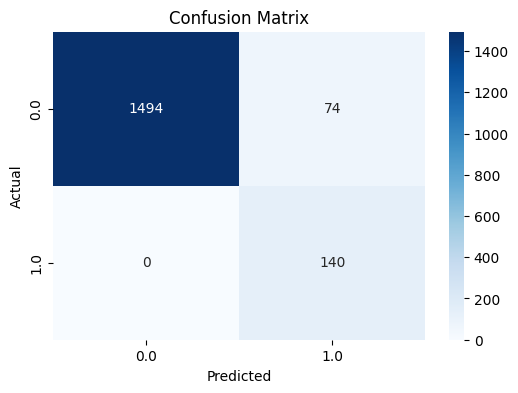

0.9566744730679156

In [ ]:
evaluate_model(svc_1, X_test, y_test)

🔹 Classification Report:
               precision  recall  f1-score  support
0.0                 1.0     1.0       1.0   1568.0
1.0                 1.0     1.0       1.0    140.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   1708.0
weighted avg        1.0     1.0       1.0   1708.0

🔹 Accuracy: 1.0000


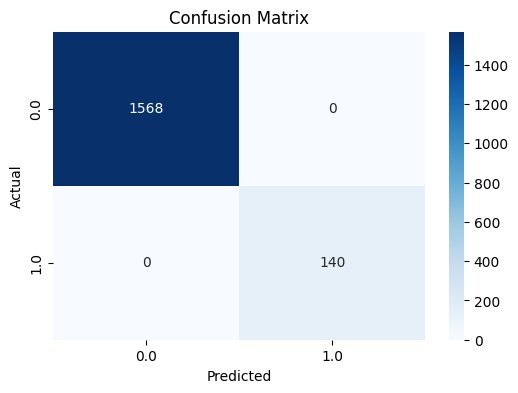

1.0

In [ ]:
evaluate_model(dtc_1, X_test, y_test)

# Performance Evaluation for Logistic Regression

In [ ]:
# Import necessary libraries if not already imported

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = logreg.predict(X_test)  # 'logreg' is your trained model

## Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9566744730679156


The Logistic Regression model achieved an accuracy of 95.67% on the test dataset.
Accuracy is a key performance metric that measures the proportion of correctly classified instances out of the total test samples.
A high accuracy score suggests that the model performs well on the given dataset.

## Calculate precision

In [ ]:
precision = precision_score(y_test, y_pred)

print(f"Precision: {precision}")

Precision: 0.6542056074766355


The Logistic Regression model achieved a precision score of 0.654 (65.42%).
Precision measures the proportion of true positive predictions among all positive predictions made by the model.


## Calculate recall

In [ ]:
recall = recall_score(y_test, y_pred)

print(f"Recall: {recall}")

Recall: 1.0


Recall measures the model's ability to correctly identify true positives out of all actual positive cases.
The model achieved a recall score of 1.0 (100%), indicating that all actual positive instances were correctly identified by the model.

## Calculate F1-score

In [ ]:
f1 = f1_score(y_test, y_pred)

print(f"F1-score: {f1}")

F1-score: 0.7909604519774012


The F1-score is the harmonic mean of precision and recall.
It provides a single metric to evaluate a model’s performance, especially in cases of class imbalance.
The previous results showed:
Precision = 0.654 (indicating a moderate false positive rate)
Recall = 1.0 (indicating no false negatives)
Since recall is perfect, but precision is moderate, the F1-score is lower than recall but higher than precision, reflecting the trade-off between the two metrics.


## Classification Report

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame and round values for readability
report_df = pd.DataFrame(report_dict).transpose().round(2)

# Print the table
print(report_df)

              precision  recall  f1-score  support
0.0                1.00    0.95      0.98  1568.00
1.0                0.65    1.00      0.79   140.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.83    0.98      0.88  1708.00
weighted avg       0.97    0.96      0.96  1708.00


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Print classification report
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    print("🔹 Classification Report:\n", report_df)

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Accuracy: {accuracy:.4f}")

    #Print f1_score
    f1_scores = f1_score(y_test, y_pred)
    print(f"\n🔹 F1-score: {f1_scores:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy, f1_scores

🔹 Classification Report:
               precision    recall  f1-score      support
0.0            1.000000  0.952806  0.975833  1568.000000
1.0            0.654206  1.000000  0.790960   140.000000
accuracy       0.956674  0.956674  0.956674     0.956674
macro avg      0.827103  0.976403  0.883397  1708.000000
weighted avg   0.971656  0.956674  0.960679  1708.000000

🔹 Accuracy: 0.9567

🔹 F1-score: 0.7910


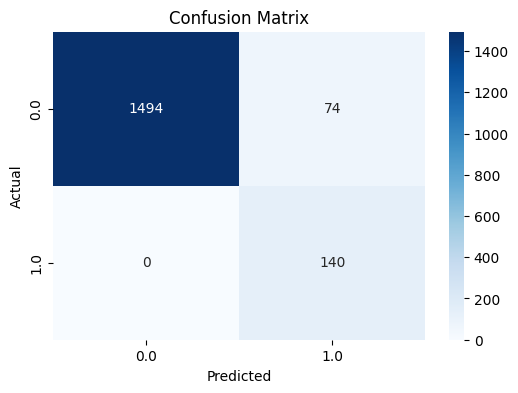

(0.9566744730679156, 0.7909604519774012)

In [ ]:
evaluate_model(logreg, X_test, y_test)